# **StackOverFlow Case Study**

### **Contents:**


1.   Loading Datasets
2.   Data wrangling         
           * Basic exploration of datasets, identification of variables and data types.
           * Handling Missing Values
           * Handling Duplicates
           * Outlier Treatment and Standardization
           * Formatting columns
          


3. Univariate Analysis

4. Bivariate Analysis
5. Multivariate Analysis 

6. Problem statement and its solutions





In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **Loading the Datasets**

In [2]:
#Loading Stackoverflow datasets for question,answers, tags and users
url= "https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Questions.csv"
q=pd.read_csv(url,encoding='latin-1')

In [3]:
url= "https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Answers.csv"
a=pd.read_csv(url,encoding='latin-1')

In [4]:
url= "https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Tags.csv"
t=pd.read_csv(url,encoding='latin-1')

In [5]:
url= "https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Users.csv"
u=pd.read_csv(url,encoding='latin-1')

# **Questions Dataset**

In [6]:
#Viewing the first 5 rows of the question dataset
q.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [7]:
#The basic information regarding the dataset
q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264216 entries, 0 to 1264215
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Id            1264216 non-null  int64  
 1   OwnerUserId   1249762 non-null  float64
 2   CreationDate  1264216 non-null  object 
 3   ClosedDate    55959 non-null    object 
 4   Score         1264216 non-null  int64  
 5   Title         1264216 non-null  object 
 6   Body          1264216 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 67.5+ MB


# **Data Wrangling**


# 1.  Handling Missing Values




In [8]:
#Creating a copy of original dataset
question= q.copy()

#To find the number of missing values in the question dataset
question.isnull().sum()

Id                    0
OwnerUserId       14454
CreationDate          0
ClosedDate      1208257
Score                 0
Title                 0
Body                  0
dtype: int64

There is two columns with null values viz. **OwnerUserId** and **ClosedDate**.
According to the Data dictionary **OwnerUserId** is the user who asked the question, so the **nan values** are those questions posted by anonymous user or a guest user of stack overflow. 
So that null value cannot be dropped or ignored. It is part of the analysis.

In [9]:
#Replacing NaN value withb zero to avoid nan value treatment
question.OwnerUserId=question.OwnerUserId.fillna(0)

In [10]:
question.isnull().sum()

Id                    0
OwnerUserId           0
CreationDate          0
ClosedDate      1208257
Score                 0
Title                 0
Body                  0
dtype: int64

The second column with null values the **ClosedDate** only means the date in which the **question** is closed or is tagged as **inactive**.So the **null values means the questions are still active** and open for answers.


# 2.  Handling Duplicate values

Same questions will be posted multiple times by different or same person.



In [11]:
#Finding the number of duplicate questions
question.duplicated().sum()

0

In [12]:
question.shape

(1264216, 7)

# 3. Handling Outliers
Only numerical value in this datset is of the scores given to the questiosn posted

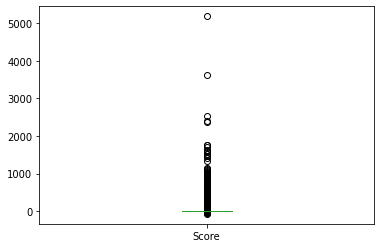

In [13]:
#Plotting boxplot to detect outliers
question['Score'].plot(kind='box')
plt.show()

In [14]:
#Removing the oulier
question= question[~(question['Score'] > 1250)]

In [15]:
question.shape

(1264198, 7)

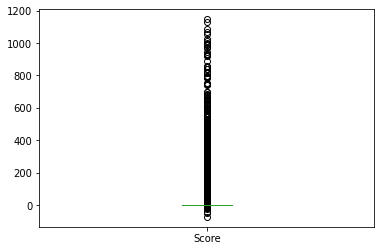

In [16]:
question.Score.plot(kind='box')
plt.show()

# 4. Formatting columns



In [17]:
#Changing the format of columns containing date and time 
question['CreationDate']=pd.to_datetime(question.CreationDate)
question['ClosedDate']=pd.to_datetime(question.ClosedDate)

In [18]:
question=question.reset_index(drop=True)

# **Answers Dataset**

In [19]:
#Viewing the first 5 rows of the answers dataset
a.head()


,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [20]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014516 entries, 0 to 2014515
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Id            int64  
 1   OwnerUserId   float64
 2   CreationDate  object 
 3   ParentId      int64  
 4   Score         int64  
 5   Body          object 
dtypes: float64(1), int64(3), object(2)
memory usage: 92.2+ MB


# **Data Wrangling**
# 1. Handling Missing Values

In [21]:
#Creating a copy of original dataset
answer=a.copy()

#To find the number of missing values in the answer dataset
answer.isnull().sum()

Id                  0
OwnerUserId     13200
CreationDate        0
ParentId            0
Score               0
Body                0
dtype: int64

Similar to the questions dataset the column with **null value is OwnerUserId** According to the Data dictionary OwnerUserId is the user who answered the question, so the **nan values** are those who posted the answer as **anonymous user or a guest user** of stack overflow. So that null value cannot be dropped or ignored. It is part of the analysis.

In [22]:
#Replacing NaN value withb zero to avoid nan value treatment
answer.OwnerUserId=answer.OwnerUserId.fillna(0)

In [23]:
#Checking for null values in dataset
answer.isnull().sum()

Id              0
OwnerUserId     0
CreationDate    0
ParentId        0
Score           0
Body            0
dtype: int64

# 2.  Handling Duplicate values

Similar answers will be posted multiple times by different or same person.

In [24]:
#Finding the mumber of duplicate answers
answer.duplicated().sum()

0

In [25]:
answer.shape

(2014516, 6)

# 3. Handling Outliers
The only nunerical value in this datset is the scores given to the answers

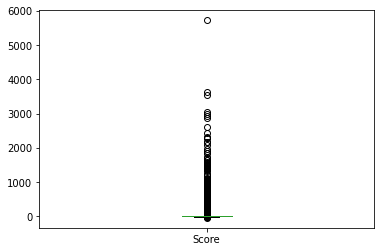

In [26]:
#Plotting boxplot to detect outliers
answer['Score'].plot(kind='box')
plt.show()

In [27]:
#Removing the ouliers
answer= answer[~(answer['Score']> 1750)]

In [28]:
answer.shape

(2014497, 6)

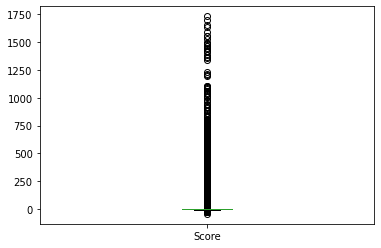

In [29]:
answer['Score'].plot(kind='box')
plt.show()

# 4. Formatting columns

In [30]:
#Changing the format of columns containing date and time 
answer['CreationDate']=pd.to_datetime(answer.CreationDate)

In [31]:
answer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2014497 entries, 0 to 2014515
Data columns (total 6 columns):
 #   Column        Dtype              
---  ------        -----              
 0   Id            int64              
 1   OwnerUserId   float64            
 2   CreationDate  datetime64[ns, UTC]
 3   ParentId      int64              
 4   Score         int64              
 5   Body          object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(1)
memory usage: 107.6+ MB


In [32]:
answer.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01 14:45:37+00:00,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01 16:09:47+00:00,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01 19:36:46+00:00,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01 23:49:57+00:00,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02 01:49:46+00:00,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [33]:
answer=answer.reset_index(drop=True)
answer.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01 14:45:37+00:00,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01 16:09:47+00:00,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01 19:36:46+00:00,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01 23:49:57+00:00,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02 01:49:46+00:00,260,28,"<p><a href=""http://www.codeproject.com/Article..."


# **Tags Dataset**

In [34]:
#Viewing the first 5 rows of the tags dataset
t.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [35]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750994 entries, 0 to 3750993
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Tag     object
dtypes: int64(1), object(1)
memory usage: 57.2+ MB


# **Data Wrangling**
# 1. Handling Missing Values

In [36]:
#Creating a copy of original dataset
tag=t.copy()

#To find the number of missing values in the dataset
tag.isnull().sum()

Id        0
Tag    1113
dtype: int64

In [37]:
#Replacing NaN values in 'Tag' with 'Unknown'
tag['Tag'].fillna('Unknown', inplace=True)

In [38]:
#Checking for null values in dataset
tag.isnull().sum()

Id     0
Tag    0
dtype: int64

In [39]:
tag.shape

(3750994, 2)

# 2. Handling Duplicates

In [40]:
#Checking for duplicates
tag.duplicated().sum()

1

In [41]:
#droping the duplicates
tag=tag.drop_duplicates()

In [42]:
tag.shape

(3750993, 2)

# **Users Dataset**

In [43]:
#Viewing the first 5 rows of the users dataset
u.head()

,Unnamed: 0,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
1,1,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
2,2,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
3,3,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
4,4,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547


In [44]:
#Dropping the first column
u.drop('Unnamed: 0', inplace=True, axis=1)

In [45]:
u.head()

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
1,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
2,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
3,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
4,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547


In [46]:
u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990480 entries, 0 to 1990479
Data columns (total 8 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   id                int64 
 1   display_name      object
 2   creation_date     object
 3   last_access_date  object
 4   reputation        int64 
 5   up_votes          int64 
 6   down_votes        int64 
 7   views             int64 
dtypes: int64(5), object(3)
memory usage: 121.5+ MB


# **Data Wrangling**
# 1. Handling Missing Values

In [47]:
#Creating a copy of original dataset
user=u.copy()

#To find the number of missing values in the dataset
user.isnull().sum()

id                    0
display_name        136
creation_date         0
last_access_date      0
reputation            0
up_votes              0
down_votes            0
views                 0
dtype: int64

In [48]:
#Replacing NaN values in 'DisplayName' with 'Unknown'
user['display_name'].fillna('Unknown', inplace=True)

In [49]:
#Checking for null values in dataset
user.isnull().sum()

id                  0
display_name        0
creation_date       0
last_access_date    0
reputation          0
up_votes            0
down_votes          0
views               0
dtype: int64

In [50]:
user.shape

(1990480, 8)

# 2. Handling Duplicates

In [51]:
#cheaking for duplicates
user.duplicated().sum()

1525020

In [52]:
#Dropping duplicates from dataset
user=user.drop_duplicates()

In [53]:
user.head()

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
27,1109,Theo,2008-08-12 12:16:58.61 UTC,2019-08-31 11:39:52.28 UTC,116072,457,136,6905
85,364174,stats,2010-06-11 03:34:57.137 UTC,2019-08-29 18:37:35.027 UTC,325,25,1,60
87,61,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779,1321,219,1731
97,20709,Black Horus,2008-09-22 20:03:39.71 UTC,2019-09-01 01:17:38.133 UTC,978,73,2,96


In [54]:
#Resetting index of dataset
user=user.reset_index(drop=True)

In [55]:
user.shape

(465460, 8)

# 3. Handling Outliers
There arer four column with numerical values which need to be evaluated for outliers.
Since there is **multi-variables with prospective outliers**, it is better to **cap and floor the variables**

### Handling variable: reputation

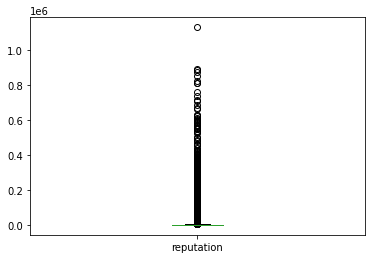

In [56]:
user['reputation'].plot(kind='box')
plt.show()

In [57]:
#Removing the ouliers
user=user[~(user['reputation']>1000000)]

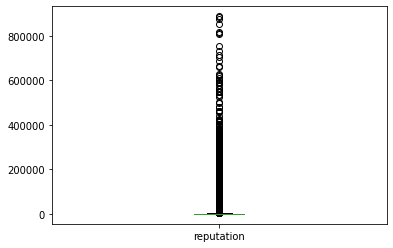

In [58]:
user['reputation'].plot(kind='box')
plt.show()

### Handling variable: upvotes

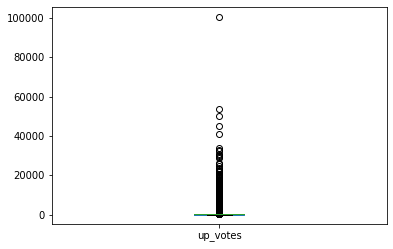

In [59]:
user['up_votes'].plot(kind='box')
plt.show()

In [60]:
#Removing the ouliers
user=user[~(user['up_votes']> 40000)]

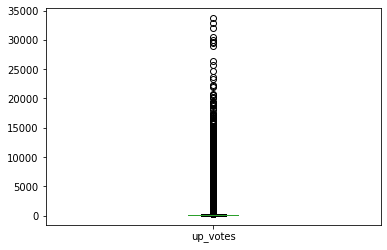

In [61]:
user['up_votes'].plot(kind='box')
plt.show()

### Handling variable: down votes

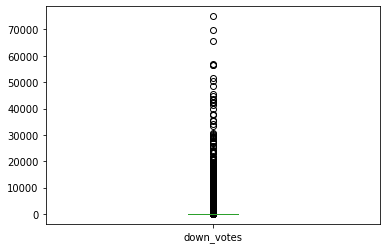

In [62]:
user['down_votes'].plot(kind='box')
plt.show()

In [63]:
#Removing the ouliers
user=user[~(user['down_votes']> 40000)]

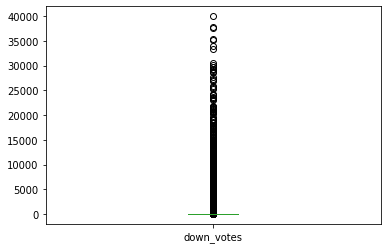

In [64]:
user['down_votes'].plot(kind='box')
plt.show()

### Handling variable: views

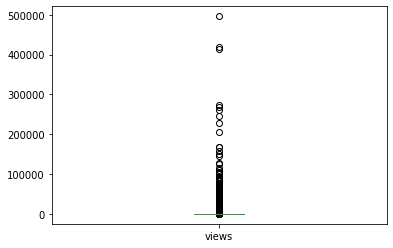

In [65]:
user['views'].plot(kind='box')
plt.show()

In [66]:
#Removing the ouliers
user=user[~(user['views']> 200000)]

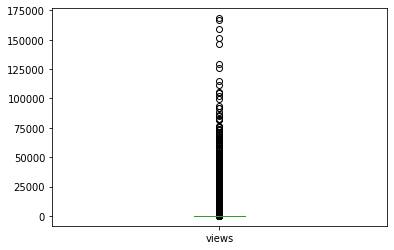

In [67]:
user['views'].plot(kind='box')
plt.show()

# 4. Formatting Columns

In [68]:
#Changing the format of columns containing date and time 
user['creation_date']=pd.to_datetime(user.creation_date)

In [69]:
user['last_access_date']=pd.to_datetime(user.last_access_date)

In [70]:
user.head()

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,26,Shawn,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
1,1109,Theo,2008-08-12 12:16:58.610000+00:00,2019-08-31 11:39:52.280000+00:00,116072,457,136,6905
2,364174,stats,2010-06-11 03:34:57.137000+00:00,2019-08-29 18:37:35.027000+00:00,325,25,1,60
3,61,Bernard,2008-08-01 14:21:00.573000+00:00,2019-08-30 07:11:58.297000+00:00,22779,1321,219,1731
4,20709,Black Horus,2008-09-22 20:03:39.710000+00:00,2019-09-01 01:17:38.133000+00:00,978,73,2,96


# Univariate Analysis

# 1. Questions Dataset

### Analysing the **OwnerUserId** which represents the Id of the user who asked the question.

In [71]:
#Calculating which user had asked the most number of questions
question['OwnerUserId'].value_counts()

0.0          14454
875317.0       250
39677.0        227
4653.0         175
651174.0       164
             ...  
4587503.0        1
2611177.0        1
5508243.0        1
3955813.0        1
5512875.0        1
Name: OwnerUserId, Length: 630906, dtype: int64

In [72]:
#Percentage of questions asked
question['OwnerUserId'].value_counts(normalize=True)*100

0.0          1.143334
875317.0     0.019775
39677.0      0.017956
4653.0       0.013843
651174.0     0.012973
               ...   
4587503.0    0.000079
2611177.0    0.000079
5508243.0    0.000079
3955813.0    0.000079
5512875.0    0.000079
Name: OwnerUserId, Length: 630906, dtype: float64

**Most of the questions**; be it active or inactive has been asked by the **OwnerUserId 0.0** who represents Anonymous or guest user. About **1.14%** of total 1264216 questions were asked by **anonymous or guest user**.
The **second highest number** of questions is been asked by the user **875317.0, about 0.019%**. The **third highest by 39677.0** and is of about **0.017%**

## Analysis of **Date** column.

In [73]:
#Date on which most number of questions were asked
question['CreationDate'].value_counts()

2014-03-07 15:01:31+00:00    2
2016-09-07 12:47:34+00:00    2
2011-07-19 14:14:34+00:00    2
2015-06-05 18:27:36+00:00    2
2014-05-27 21:02:22+00:00    2
                            ..
2015-05-25 08:54:47+00:00    1
2014-03-14 13:56:05+00:00    1
2016-02-02 09:13:52+00:00    1
2011-08-11 02:19:57+00:00    1
2010-06-21 15:52:09+00:00    1
Name: CreationDate, Length: 1264189, dtype: int64

The most number of questions asked is about 2 that too on multiple dates. Tha analysis have not given any fruitful insights.

In [74]:
question['ClosedDate'].value_counts()

2014-03-06 21:15:55+00:00    2
2016-10-18 10:17:30+00:00    2
2012-07-25 14:00:18+00:00    2
2013-03-19 13:09:06+00:00    2
2013-05-17 13:31:52+00:00    2
                            ..
2015-10-23 21:29:13+00:00    1
2013-07-19 00:31:57+00:00    1
2014-04-19 10:36:48+00:00    1
2013-01-09 00:48:21+00:00    1
2013-12-31 13:27:57+00:00    1
Name: ClosedDate, Length: 55949, dtype: int64

The most number of questions closed also is about 2 that too on multiple dates. Tha analysis have not given any fruitful insights.

In [75]:
#Creating a new column to see the time taken for creation and closure of a question
question['TimeTaken']= question['ClosedDate']-question['CreationDate']

In [76]:
#Calculating the minimum and maximum time taken for the closure of a question
print("Least Time taken for closing a question : ",question['TimeTaken'].min())
print("Maximum time taken for the closing of a question : ",question['TimeTaken'].max())
print("Average time taken for the closure of a question : ", question['TimeTaken'].mean())

Least Time taken for closing a question :  0 days 00:00:13
Maximum time taken for the closing of a question :  2971 days 23:20:43
Average time taken for the closure of a question :  138 days 01:10:29.731231788


**Based on** data from **ClosedDate** cloumn on an **average it takes 138 days to close a question** or in other words a question to be marked closed for answers

## Analysis of **Score** column

In [77]:
#Calculating the range of Scores
print('Maximum score given to a question: ', question['Score'].max())
print('Minimum score given to a question: ', question['Score'].min())
range=question['Score'].max()-question['Score'].min()
print('Range of Scores given to question is : ', range)

Maximum score given to a question:  1147
Minimum score given to a question:  -73
Range of Scores given to question is :  1220


In [78]:
#Summary statistics of Score variable
question['Score'].describe()

count    1.264198e+06
mean     1.752725e+00
std      1.075818e+01
min     -7.300000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.147000e+03
Name: Score, dtype: float64

It is clear from above analysis that the distribution is now normal and the variable has been handled properly. The average score given to question is 1.75

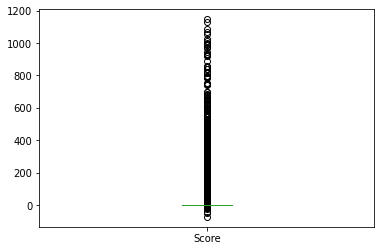

In [79]:
#Visualization of Score variable
question['Score'].plot(kind='box')
plt.show()

### Analysis of **Title** column

In [80]:
#basic summary statistics
question['Title'].describe()

count                                      1264198
unique                                     1263977
top       Input string was not in a correct format
freq                                             6
Name: Title, dtype: object

**The most frequently asked question is related to "Input string was not in a correct format"**. Eventhough it cannot be called as the most frequently asked question explicitily, still its been asked 6 times. 

# 2. Answer Dataset

### Analysing the OwnerUserId 

In [81]:
#Calculating which user had answered the most number of questions
answer['OwnerUserId'].value_counts(normalize=True)*100

0.0          0.655250
22656.0      0.162323
1144035.0    0.149367
29407.0      0.106429
548225.0     0.095508
               ...   
1611998.0    0.000050
5276243.0    0.000050
1458414.0    0.000050
111919.0     0.000050
1436013.0    0.000050
Name: OwnerUserId, Length: 468797, dtype: float64

**Most of the answers are by anonymous or guest users**, about 0.6%.
The **second highest** is done by OwnerUserId **1144035**, about 0.15% and so on. 

### Analysis of Date column.

In [82]:
#Date on which most number of questions were asked
answer['CreationDate'].value_counts()

2013-08-27 15:04:48+00:00    3
2012-09-17 16:45:48+00:00    3
2013-01-22 13:02:29+00:00    3
2014-03-04 15:05:46+00:00    3
2015-02-26 13:03:23+00:00    3
                            ..
2011-12-30 13:44:31+00:00    1
2010-05-24 20:18:28+00:00    1
2011-11-06 13:21:05+00:00    1
2010-04-19 14:54:00+00:00    1
2012-07-17 08:08:12+00:00    1
Name: CreationDate, Length: 2002748, dtype: int64

Similar to the question dataset, no fruitful insights from this analysis

### Analysis of ParentId column

In [83]:
answer['ParentId'].value_counts()

406760      408
38210       316
23930       129
100420      100
40480        67
           ... 
2580820       1
10957150      1
31900000      1
26076960      1
21768920      1
Name: ParentId, Length: 1102568, dtype: int64

**Most number of questions** came from the question Id **406760 and 38210**

### Analysis of Score column

In [84]:
#Calculating the range of Scores
print('Maximum score given to a question: ', answer['Score'].max())
print('Minimum score given to a question: ', answer['Score'].min())


Maximum score given to a question:  1730
Minimum score given to a question:  -42


In [85]:
#Summary statistics of Score variable
answer['Score'].describe()

count    2.014497e+06
mean     2.455454e+00
std      1.337130e+01
min     -4.200000e+01
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.730000e+03
Name: Score, dtype: float64

It can be seen that the distribution of the data is normal and outliers are handled properly.
On an **average there is about 2.46 score** given to the answeres posted.

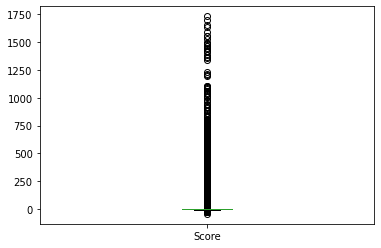

In [86]:
#Visualization of Score variable
answer['Score'].plot(kind='box')
plt.show()

# 3. Tags Dataset

### Analysis of Id column

In [87]:
#Calculating the most tagged question
tag['Id'].value_counts()

21768920    5
34819770    5
28090750    5
14455460    5
34409880    5
           ..
13222570    1
25801380    1
2765240     1
38435070    1
39346820    1
Name: Id, Length: 1264216, dtype: int64

Several Questions have more than 5 tags attched to them.

### Analysing Tags column

In [88]:
#Most frequently used tags
tag['Tag'].value_counts(normalize=True)*100

javascript              3.309924
java                    3.071507
c#                      2.697579
php                     2.634182
android                 2.416933
                          ...   
program-structure       0.000027
qlogin                  0.000027
sharepoint-documents    0.000027
cjson                   0.000027
routedevents            0.000027
Name: Tag, Length: 37035, dtype: float64

**Javascript and Java** are most frequently used tags. Around **3% of tags** are them. 

In [89]:
#Basic summary statistics
tag['Tag'].describe()

count        3750993
unique         37035
top       javascript
freq          124155
Name: Tag, dtype: object

There is **37035 uniques tags** in total. 

# 4. Users Dataset

### Analysing the creation_date and last_access_date column

In [90]:
#Creating a new column to cheack the activity of users
user['ActiveTime']=user['last_access_date']- user['creation_date']

In [91]:
user['ActiveTime'].value_counts()

0 days 00:00:00              5039
0 days 00:16:09.594000          2
0 days 00:15:19.730000          2
0 days 00:15:03.780000          2
2220 days 03:27:00.340000       2
                             ... 
2118 days 00:52:06.324000       1
1401 days 23:11:30.566000       1
2385 days 19:12:01.570000       1
2236 days 05:15:28.633000       1
2494 days 19:07:25.580000       1
Name: ActiveTime, Length: 460384, dtype: int64

In [92]:
print("StackOverflow's oldest member is : ", user['ActiveTime'].max(), "old")

StackOverflow's oldest member is :  4048 days 13:40:47.583000 old


**Most** of the signed up **users have never accessed** the website after signup. Around **5039 user never accessed** the site at all after signing up. 


### Analysis of reputation column

In [93]:
#Basic summary statistics
user['reputation'].describe()

count    465428.000000
mean       1954.355778
std       10192.231820
min           1.000000
25%          66.000000
50%         353.000000
75%        1164.000000
max      732984.000000
Name: reputation, dtype: float64

The average reputation score is about 1954.35.
The minimum reputation is 1.0 and the maximum is 732984. 


### Analysis of up_votes column

In [94]:
#Basic summary statistics
user['up_votes'].describe()

count    465428.000000
mean        191.772096
std         603.189415
min           0.000000
25%           3.000000
50%          26.000000
75%         130.000000
max       33777.000000
Name: up_votes, dtype: float64

The average number of up votes received by a user is 192.
The maximum number of up votes received by a user is 33777 and minimum is 0

### Analysis of down_votes column

In [95]:
#Basic summary statistics
user['down_votes'].describe()

count    465428.000000
mean         26.839447
std         389.317948
min           0.000000
25%           0.000000
50%           0.000000
75%           5.000000
max       39975.000000
Name: down_votes, dtype: float64

The average number of down votes received by a user is 27.
The maximum number of down votes received is 39975 and minimum is 0

### Analysing Views Column

In [96]:
#Basic summary statistics
user['views'].describe()

count    465428.000000
mean        227.833203
std        1403.367208
min           0.000000
25%          12.000000
50%          45.000000
75%         144.000000
max      168194.000000
Name: views, dtype: float64

The average number of views got for the user profile is 228.
the maximum views rfeceived is 168194 and minimum is 0.

# Noteworthy insights from univariate analysis


*   Most of the questios asked and answered were by anonymous or guest users 
*   The average time taken from the creation to closure of a question is about 138 days

*   The average scores given for the questions and answers were 1.75 and 2.46
*   The most frequesntly asked question is related to the format of the input string being wrong

*   Out of 37035 unique tags the most used tags are javascript and java. This comprised about 3% of the total tags
*   Most of the signed up user never accessed the website after signing up. 

*   The average reputation score given to the users is around 1954.35
*   The average up votes received by users is 192

*   The average down votes received by users is 27
*   The average number of views got for user profile is 228












# Bivariate Analysis

The Datasets question, answer and tags have not much to do in Bivariate analysis. Insights can only be obtained by merging these dataseta.
But User dataset have some interest varables and bivariate analysis will be possible.

In [97]:
#Basic Summary statistics
user.describe()

,id,reputation,up_votes,down_votes,views,ActiveTime
count,4.654280e+05,465428.000000,465428.000000,465428.000000,465428.000000,465428
mean,2.250229e+06,1954.355778,191.772096,26.839447,227.833203,1974 days 03:56:22.917348192
std,1.789194e+06,10192.231820,603.189415,389.317948,1403.367208,1082 days 17:53:46.408574368
min,3.000000e+00,1.000000,0.000000,0.000000,0.000000,0 days 00:00:00
25%,7.665438e+05,66.000000,3.000000,0.000000,12.000000,1221 days 00:40:07.410250
50%,1.774630e+06,353.000000,26.000000,0.000000,45.000000,2107 days 13:08:23.875000
75%,3.478606e+06,1164.000000,130.000000,5.000000,144.000000,2787 days 01:09:09.338500
max,7.045028e+06,732984.000000,33777.000000,39975.000000,168194.000000,4048 days 13:40:47.583000


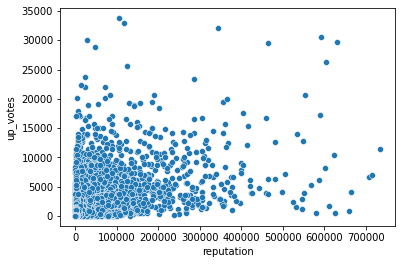

In [98]:
#Checking whether there is correlation between reputation and upvotes
sns.scatterplot(data=user, x='reputation', y='up_votes')
plt.show()

There is no significant correlation here

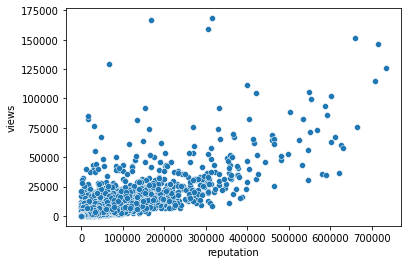

In [99]:
#Checking whether there is correlation between reputation and views
sns.scatterplot(data=user, x='reputation', y='views')
plt.show()

There is a significant correlation between reputaion and views. As the Reputation of a user increases, the views to that user's profile is also increasing to a certain extent.

# Multivariate Analysis

Multivariate analysis is done on user dataset only

In [100]:
#Subsetting user datset for multivariate analysis
corrmatrix=user.iloc[:,4:8].corr()

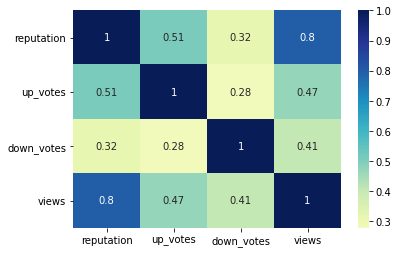

In [101]:
#Plotting correlation matrix
sns.heatmap(corrmatrix, annot=True, cmap='YlGnBu', center=0.6)
plt.show()

It can be seen that there is strong correlation between reputation and views not much correlation amoung other variables.

# Problem statement and their solutions

### **Problem 1:** When a user raises a question with a data science tag ('python', 'r', 'matlab', 'sas', 'excel', 'sql'), then Stack Overflow sends the notification to the relevant users.

**Solution:**
To answer this question we need to merge question, tag and answer datasets

In [102]:
#Merging tag and question dataset
questiontag=pd.merge(tag,question, on='Id')
questiontag.head()

,Id,Tag,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,TimeTaken
0,80,flex,26.0,2008-08-01 13:57:07+00:00,NaT,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,NaT
1,80,actionscript-3,26.0,2008-08-01 13:57:07+00:00,NaT,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,NaT
2,80,air,26.0,2008-08-01 13:57:07+00:00,NaT,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,NaT
3,90,svn,58.0,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,1607 days 13:04:25
4,90,tortoisesvn,58.0,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,1607 days 13:04:25


In [103]:
#Merging answer dataset to the above merged question dataset
df1=pd.merge(questiontag, answer, left_on='Id', right_on='ParentId')

In [104]:
#Definig a list consisting of dat science tags to filter the dataset
ds=['python', 'r', 'matlab', 'sas', 'excel', 'sql']

In [105]:
#Filtering the final dataset to only datascience tags
df1=df1[df1['Tag'].isin(ds)]
df1.head()

,Id_x,Tag,OwnerUserId_x,CreationDate_x,ClosedDate,Score_x,Title,Body_x,TimeTaken,Id_y,OwnerUserId_y,CreationDate_y,ParentId,Score_y,Body_y
21,120,sql,83.0,2008-08-01 15:50:08+00:00,NaT,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,NaT,124363,12734.0,2008-09-23 22:41:11+00:00,120,9,<p>The Jeff Prosise version from MSDN magazine...
450,1970,sql,116.0,2008-08-05 06:39:31+00:00,NaT,10,What language do you use for PostgreSQL trigge...,<p>PostgreSQL is interesting in that it suppor...,NaT,1971,269.0,2008-08-05 06:43:30+00:00,1970,3,<p>When I wrote my first trigger it was in Per...
451,1970,sql,116.0,2008-08-05 06:39:31+00:00,NaT,10,What language do you use for PostgreSQL trigge...,<p>PostgreSQL is interesting in that it suppor...,NaT,3454,277.0,2008-08-06 14:26:08+00:00,1970,5,"<p>I have only really used PL/pgSQL, but that ..."
452,1970,sql,116.0,2008-08-05 06:39:31+00:00,NaT,10,What language do you use for PostgreSQL trigge...,<p>PostgreSQL is interesting in that it suppor...,NaT,59345,1081.0,2008-09-12 15:39:39+00:00,1970,2,<p>Skype uses <strong>PostgreSQL</strong> toge...
453,1970,sql,116.0,2008-08-05 06:39:31+00:00,NaT,10,What language do you use for PostgreSQL trigge...,<p>PostgreSQL is interesting in that it suppor...,NaT,69641,11116.0,2008-09-16 05:43:22+00:00,1970,4,"<p>I write pretty much everything in plpgsql, ..."


In [106]:
#Grouping dataset based on tags and popular user who have answered
result1=(df1.groupby(['Tag'])['OwnerUserId_y'].value_counts()).to_frame()

#Renaming and fixing the column
result1=result1.rename(columns={"OwnerUserId_y": "Question Count"})
result1.reset_index(level=1, inplace=True)
result1=result1.rename(columns={"OwnerUserId_y": "UserId"})
result1.reset_index(level=0, inplace=True)
#Final dataset
result1.head()


,Tag,UserId,Question Count
0,excel,2474656.0,262
1,excel,1505120.0,257
2,excel,4039065.0,222
3,excel,1140579.0,156
4,excel,478884.0,139


In [107]:
#Limiting the result to users who have answered at least 20 questions from the respective tags
result1=result1[~(result1['Question Count']<20)]

#Shape of dataset
result1.shape

(1253, 3)

In [108]:
#Changing the result to a list
r1=result1.iloc[:,0:2]
notification_user=r1.values.tolist()

### **Problem 2**: When a user provides a data science tag ('python', 'r', 'matlab', 'sas', 'excel', 'sql') to their question, then Stack Overflow should come up with the expected approximate time to get it answered.

Solution: The minumum time taken for a responce to the posted question can be found by the time difference between posting and answering the question. 
The same merged dataset can be used in this case also

In [109]:
#Calculating the time between the creation and answering of the question
df1['ResponceTime']= df1['CreationDate_y']-df1['CreationDate_x']

#Importing module for proper time formatting
import datetime as dt

#limiting the values of responce time to only legit values
df2=df1[(df1['ResponceTime']>(pd.Timedelta('0 days')))]

#Grouping the responcs time based on tags and their minimum values
result2=(df2.groupby(['Tag'])['ResponceTime'].min()).to_frame()

#converting the time in seconds
result2['ResponceTime']=result2['ResponceTime'].dt.seconds
result2.head()

,ResponceTime
Tag,
excel,16
matlab,44
python,1
r,19
sas,116


In [110]:
#reindexing and fixing the column to get a proper dataset
result2.reset_index(level=0, inplace=True)

#shape of dataset
result2.shape

#Changing the result to list
min_responce_time=result2.values.tolist()

### **Problem 3**: While a user raises a question, Stack Overflow wants to provide some suggestions to the users to get their queries answered quickly.

Solution: To suggest tags for the newly posted question, we only need to run the apriori algotithm to find the frequently occuring tags

In [111]:
#aggregating tags under single questionId
result3=tag.groupby(['Id'], as_index=False).agg(','.join)
result3.head()

,Id,Tag
0,80,"flex,actionscript-3,air"
1,90,"svn,tortoisesvn,branch,branching-and-merging"
2,120,"sql,asp.net,sitemap"
3,180,"algorithm,language-agnostic,colors,color-space"
4,260,"c#,.net,scripting,compiler-construction"


In [112]:
#Importing modules for applying the apriori algorithm
from apyori import apriori

#Generating Apriori model
#Converting dataset into list
tags=[]
for i in range(len(result3)):
  tags.append([str(tag.values[i,j]) for j in range])


ModuleNotFoundError: No module named 'apyori'